# Question 13: Numerical derivatives

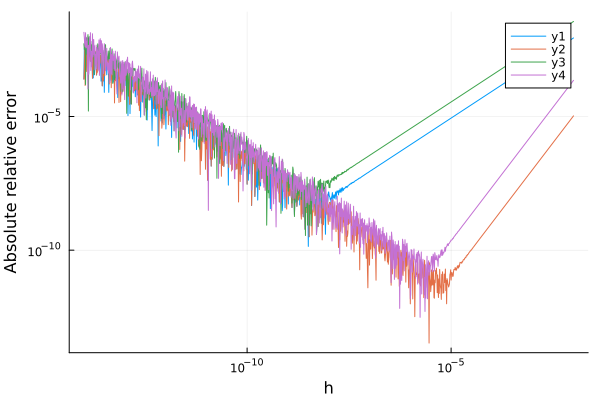

In [ ]:
# Adaoted from the code provided in Lecture Unit 4.

using Plots

function calculate_numerical_derivative_error(x0, f, fprime; h_range = 10 .^10(-14:0.01:-2), diff_scheme = (f, x; h=sqrt(eps())) -> (f(x + h) - f(x)) / h)
    errs = [abs(diff_scheme(f, x0; h = h) - fprime(x0))/abs(fprime(x0)) for h in h_range]
    return errs
end

function plot_numerical_derivative_error(x0, f, fprime; h_range = 10 .^(-14:0.01:-2), diff_scheme = (f, x; h=sqrt(eps())) -> (f(x + h) - f(x)) / h)
    errs = calculate_numerical_derivative_error(x0, h_range, f, fprime, diff_scheme=diff_scheme)
    plot(h_range, errs,
        yaxis = :log,xaxis = :log,
        xlabel="h" ,ylabel="Absolute relative error",
        #label = ["x = $x0" "x = $x1"],
        #c = [:red :blue :green :brown],
        #legend = :topright
    )
end

function plot_numerical_derivative_error!(x0, f, fprime; h_range = 10 .^(-14:0.01:-2), diff_scheme = (f, x; h=sqrt(eps())) -> (f(x + h) - f(x)) / h)
    errs = calculate_numerical_derivative_error(x0, f, fprime; h_range=h_range, diff_scheme=diff_scheme)
    plot!(h_range, errs)
end

diff_forward(f, x; h = sqrt(eps())) = (f(x + h) - f(x)) / h
diff_central(f, x; h = sqrt(eps())) = (f(x + h/2) - f(x - h/2)) / h


plot_numerical_derivative_error(0.5, x -> sin(x^2), x -> 2x*cos(x^2); diff_scheme=diff_forward)
plot_numerical_derivative_error!(0.5, x -> sin(x^2), x -> 2x*cos(x^2); diff_scheme=diff_central)

plot_numerical_derivative_error!(1, x -> exp(3*x^2), x -> 6x * exp(3*x^2); diff_scheme=diff_forward)
plot_numerical_derivative_error!(1, x -> exp(3*x^2), x -> 6x * exp(3*x^2); diff_scheme=diff_central)